In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/apple-stock-price-prediction-10-years/aapl_2014_2023.csv


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')
%matplotlib inline
%matplotlib inline

/tmp/ipykernel_34/3835714011.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# First lets do some exploratory data analysis

In [4]:
df=pd.read_csv("/kaggle/input/apple-stock-price-prediction-10-years/aapl_2014_2023.csv")

In [5]:
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,19.282236,19.265060,18.372604,18.484713,0.194637,19.979268,0.321428,0.305722,0.316301,bearish
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,19.297314,19.267243,18.398896,18.501371,0.132887,19.936375,0.473929,0.329752,0.327561,bullish
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,19.310864,19.273472,18.418311,18.519794,0.091398,19.893571,0.471428,0.349991,0.337837,bearish
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,19.316671,19.274008,18.433146,18.535080,0.046768,19.857893,0.287141,0.341013,0.334216,bullish
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,19.329171,19.279313,18.449414,18.552493,0.021012,19.816875,0.245355,0.327347,0.327868,bearish


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2516 non-null   object 
 1   open       2516 non-null   float64
 2   high       2516 non-null   float64
 3   low        2516 non-null   float64
 4   close      2516 non-null   float64
 5   volume     2516 non-null   int64  
 6   rsi_7      2516 non-null   float64
 7   rsi_14     2516 non-null   float64
 8   cci_7      2516 non-null   float64
 9   cci_14     2516 non-null   float64
 10  sma_50     2516 non-null   float64
 11  ema_50     2516 non-null   float64
 12  sma_100    2516 non-null   float64
 13  ema_100    2516 non-null   float64
 14  macd       2516 non-null   float64
 15  bollinger  2516 non-null   float64
 16  TrueRange  2516 non-null   float64
 17  atr_7      2516 non-null   float64
 18  atr_14     2516 non-null   float64
 19  target     2516 non-null   object 
dtypes: float

there are no null values for us to take care of.

In [7]:
df['date']=pd.to_datetime(df['date'])
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,19.282236,19.265060,18.372604,18.484713,0.194637,19.979268,0.321428,0.305722,0.316301,bearish
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,19.297314,19.267243,18.398896,18.501371,0.132887,19.936375,0.473929,0.329752,0.327561,bullish
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,19.310864,19.273472,18.418311,18.519794,0.091398,19.893571,0.471428,0.349991,0.337837,bearish
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,19.316671,19.274008,18.433146,18.535080,0.046768,19.857893,0.287141,0.341013,0.334216,bullish
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,19.329171,19.279313,18.449414,18.552493,0.021012,19.816875,0.245355,0.327347,0.327868,bearish


In [8]:
df["date"].dtype

dtype('<M8[ns]')

In [9]:
df['year'] = df['date'].dt.year
df.tail()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target,year
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,43.616382,54.609714,-125.833264,-50.518147,...,188.226229,181.768301,183.982764,2.636317,193.668500,2.440003,2.744973,2.790613,neutral,2023
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,40.755941,53.026883,-128.310846,-89.108636,...,188.415396,181.787101,184.162313,2.306308,193.831501,1.059997,2.504262,2.666998,neutral,2023
2513,2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,41.568718,53.291938,-115.745604,-116.860553,...,188.601067,181.898701,184.340287,2.029448,193.969001,2.410004,2.490796,2.648641,neutral,2023
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,45.331639,54.481470,-36.040033,-56.848224,...,188.796319,182.046001,184.523252,1.823710,194.179501,1.510010,2.350684,2.567310,bearish,2023
2515,2023-12-29,193.899994,194.399994,191.729996,192.529999,42628800,38.304340,51.061838,-76.639398,-82.668387,...,188.942738,182.173301,184.681801,1.557975,194.308501,2.669998,2.396300,2.574645,bearish,2023


In [10]:
df=df.set_index('date')
df.head()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target,year
date,,,,,,,,,,,,,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,19.282236,19.265060,18.372604,18.484713,0.194637,19.979268,0.321428,0.305722,0.316301,bearish,2014
2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,19.297314,19.267243,18.398896,18.501371,0.132887,19.936375,0.473929,0.329752,0.327561,bullish,2014
2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,19.310864,19.273472,18.418311,18.519794,0.091398,19.893571,0.471428,0.349991,0.337837,bearish,2014
2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,19.316671,19.274008,18.433146,18.535080,0.046768,19.857893,0.287141,0.341013,0.334216,bullish,2014
2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,19.329171,19.279313,18.449414,18.552493,0.021012,19.816875,0.245355,0.327347,0.327868,bearish,2014


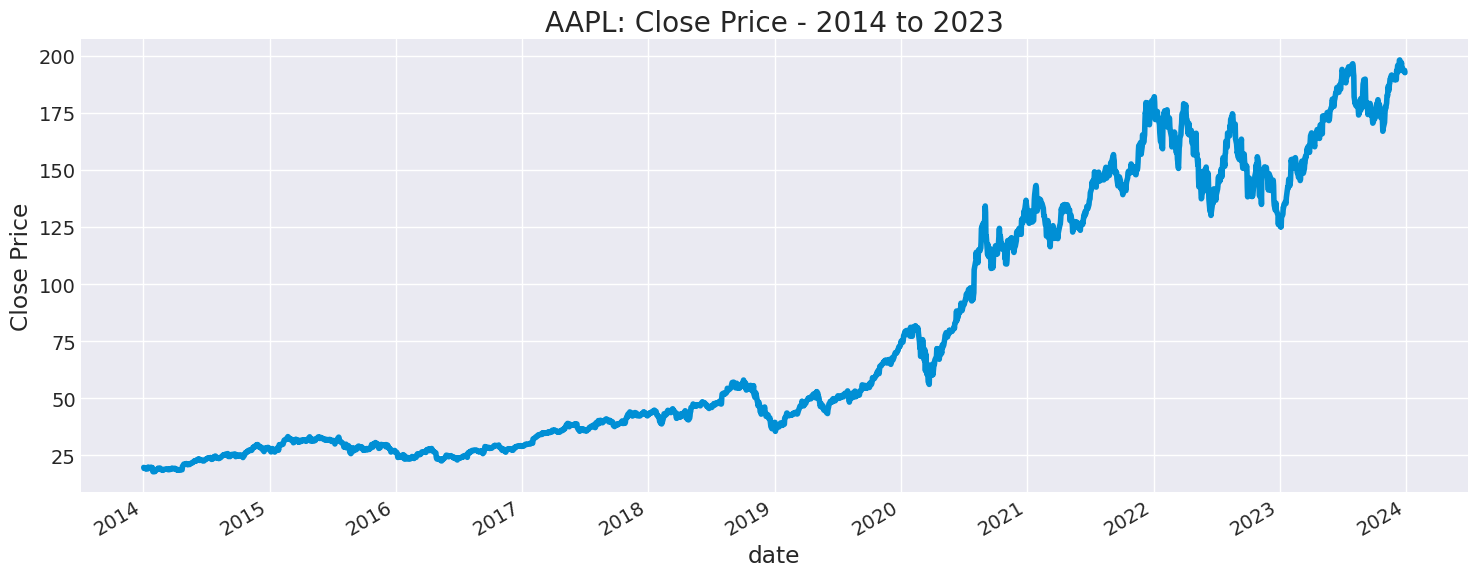

In [20]:
plt.figure(figsize=(15, 6))
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f"AAPL: Close Price - 2014 to 2023")
df['close'].plot()
plt.tight_layout()

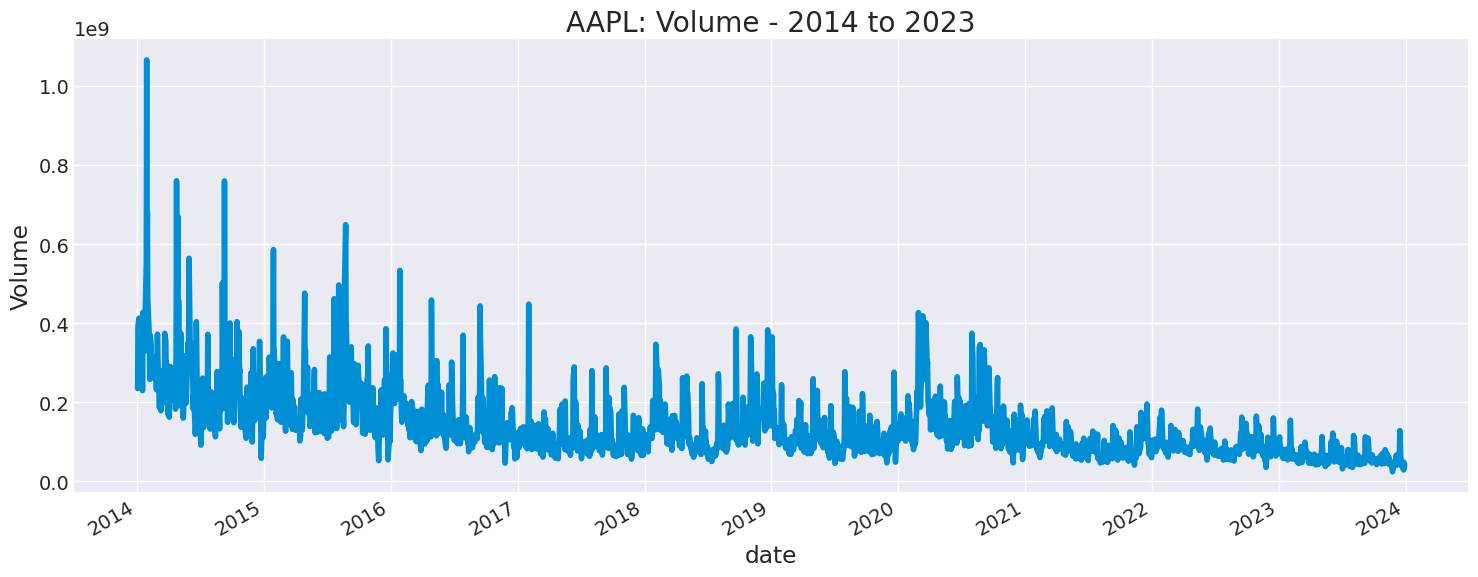

In [21]:
plt.figure(figsize=(15, 6))
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title(f"AAPL: Volume - 2014 to 2023")
df['volume'].plot()
plt.tight_layout()

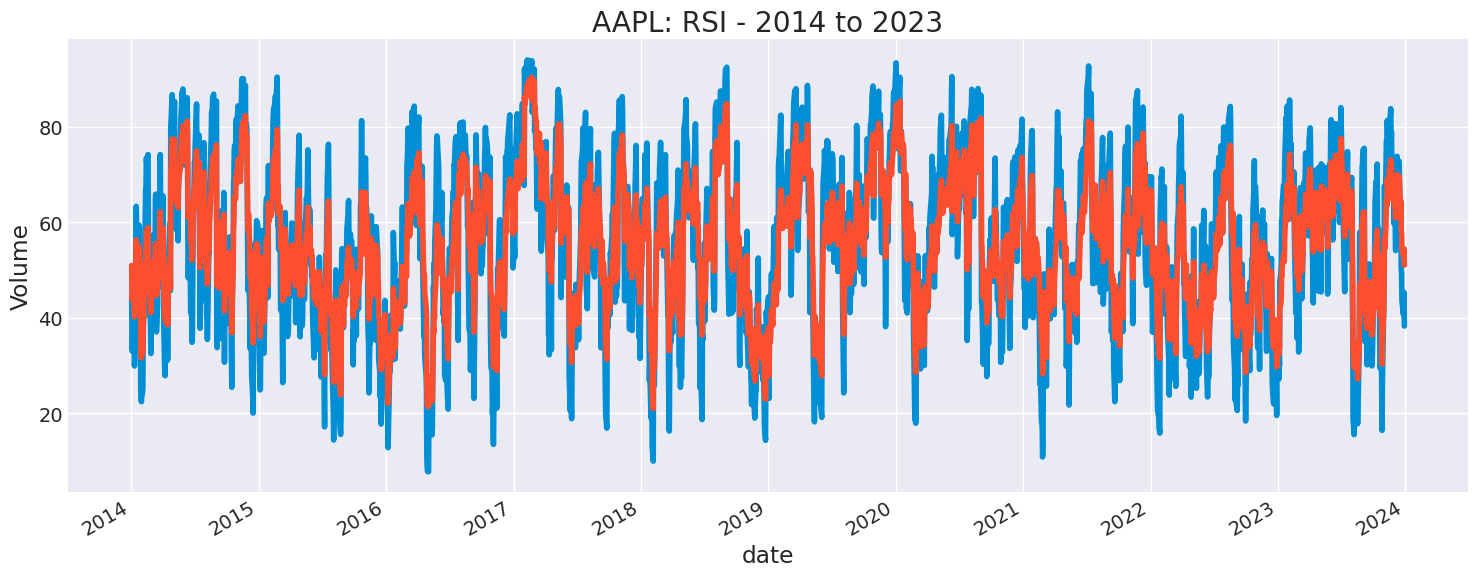

In [22]:
plt.figure(figsize=(15, 6))
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title(f"AAPL: RSI - 2014 to 2023")
df['rsi_7'].plot()
df['rsi_14'].plot()
plt.tight_layout()

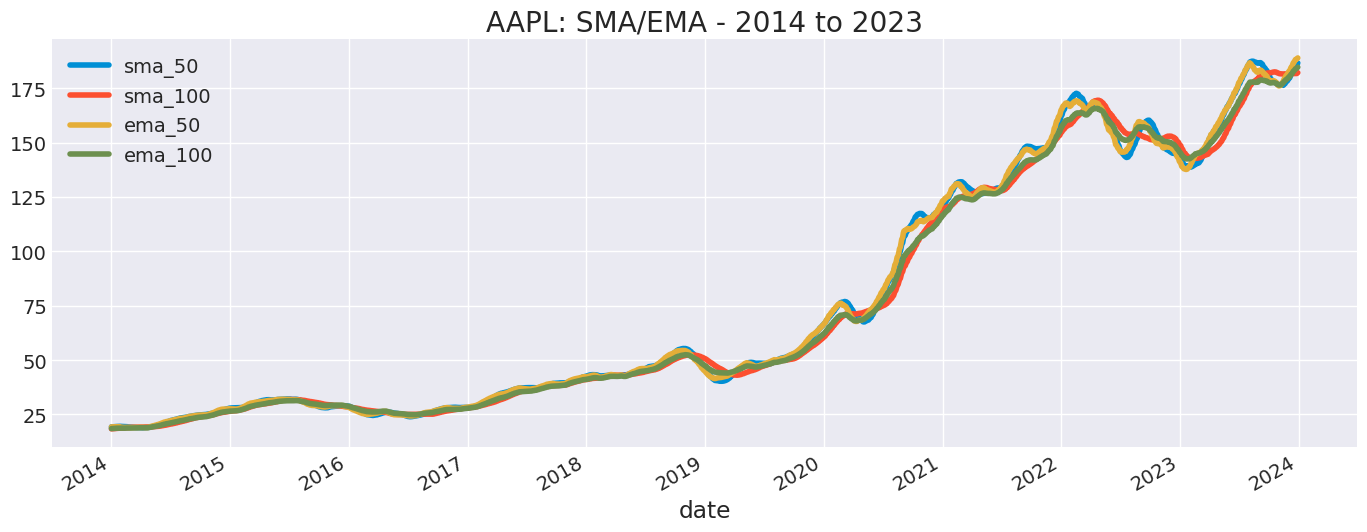

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(6)
fig.set_figwidth(15)
df[['sma_50','sma_100','ema_50','ema_100']].plot(ax=axes)
axes.set_title('AAPL: SMA/EMA - 2014 to 2023')
plt.show()

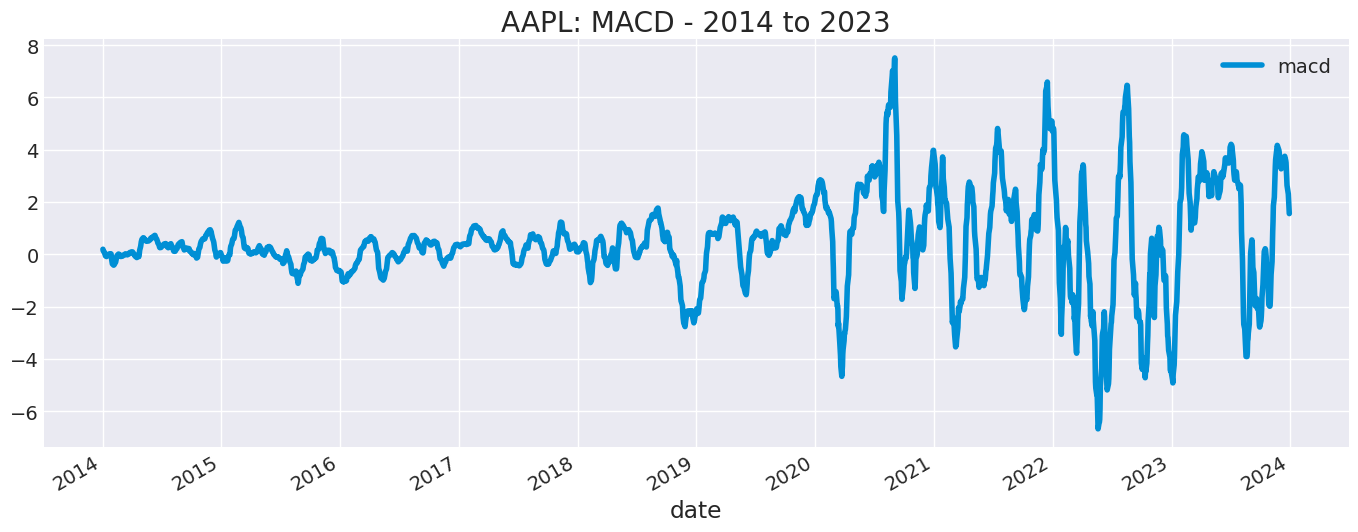

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(6)
fig.set_figwidth(15)
df[['macd']].plot(ax=axes)
axes.set_title('AAPL: MACD - 2014 to 2023')
plt.show()

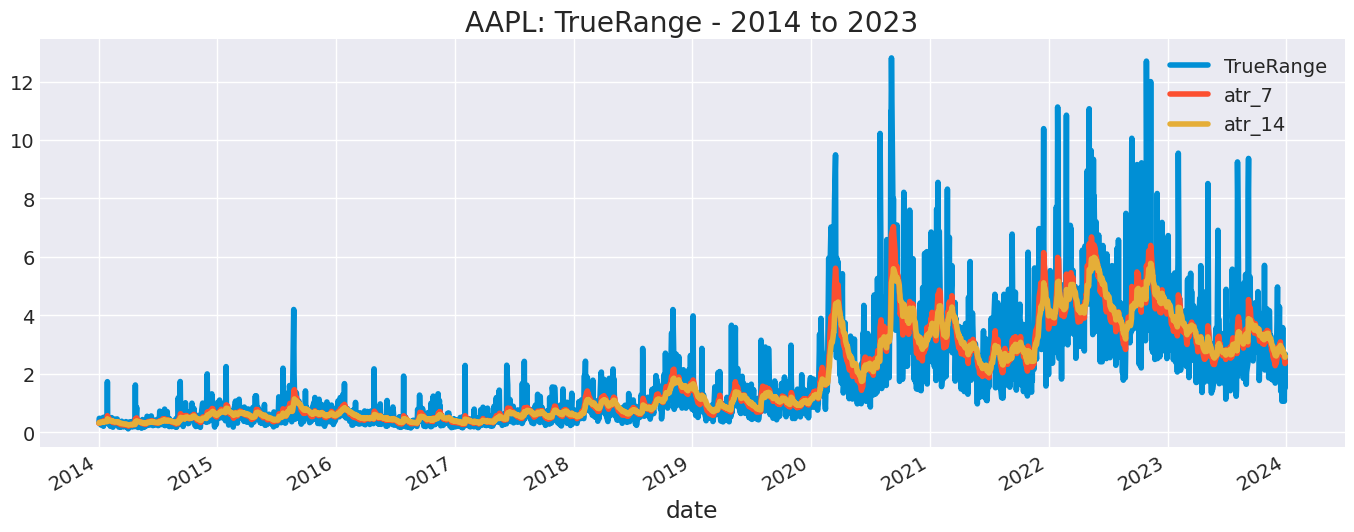

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(6)
fig.set_figwidth(15)
df[['TrueRange','atr_7','atr_14']].plot(ax=axes)
axes.set_title('AAPL: TrueRange - 2014 to 2023')
plt.show()

In [26]:
category_counts = df['target'].value_counts()
category_counts

target
bullish    951
neutral    786
bearish    779
Name: count, dtype: int64

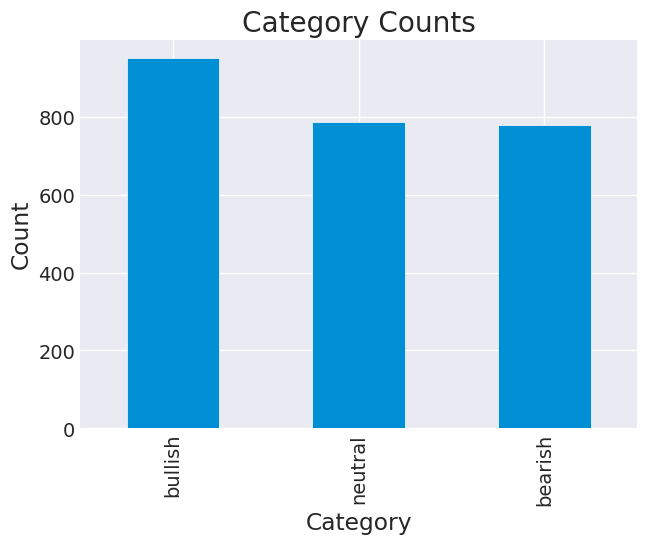

In [27]:
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts')
plt.show()

In [28]:
X=df.drop(['target','year'],axis=1)
y=df['target']

Number of Continous Variables:  17


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

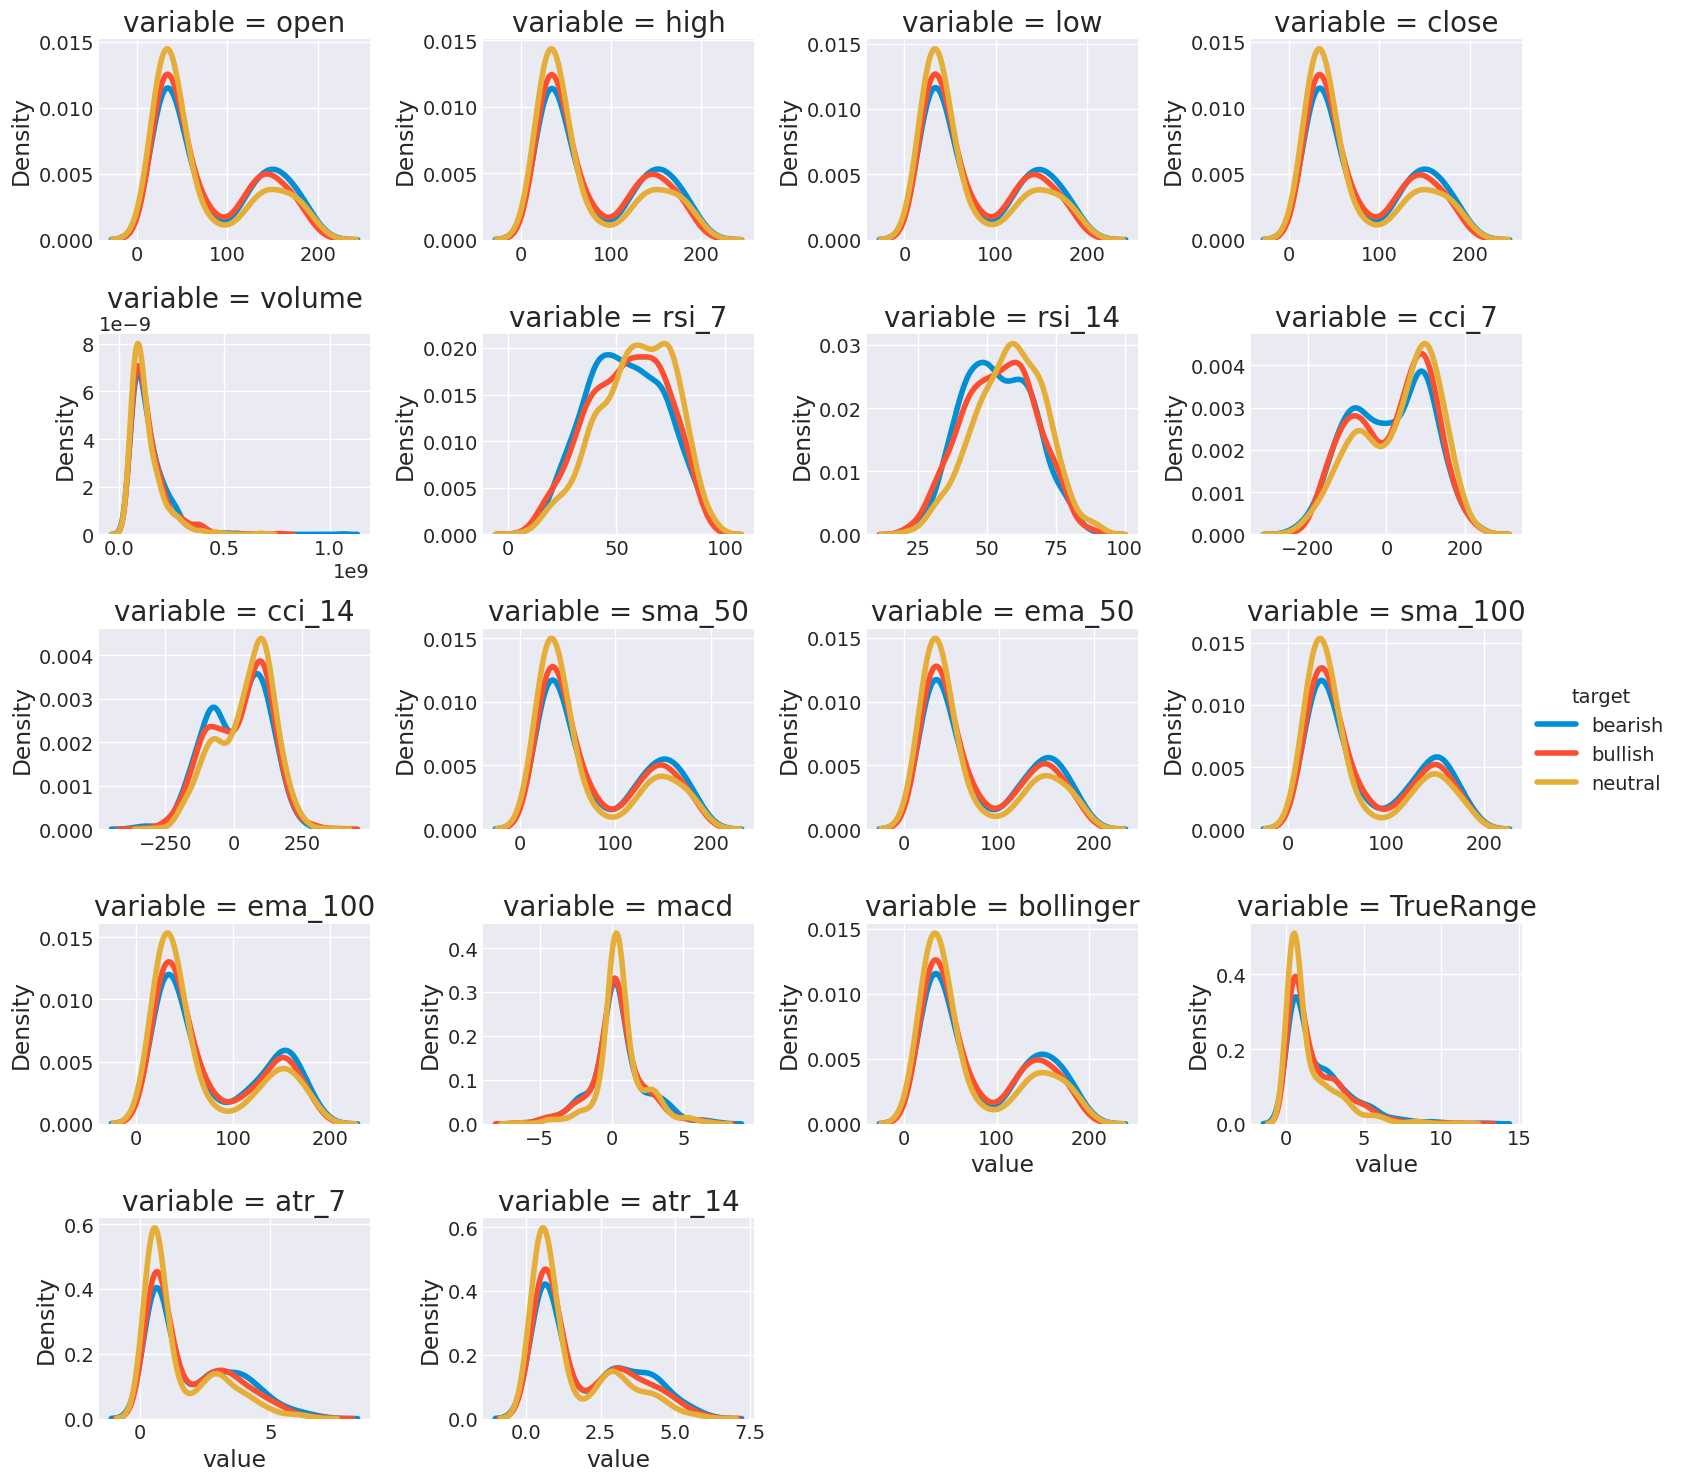

In [29]:
df_nnunique = df.nunique().reset_index().rename(columns = {"index": "cols",0:"unique_num"})
continuous = list(df_nnunique.loc[df_nnunique.unique_num > 10, "cols"])
print("Number of Continous Variables: ", len(continuous)-1)
#
melt_df = pd.melt(pd.concat([df.loc[:,continuous],y],axis=1), id_vars='target')
grid = sns.FacetGrid(melt_df,col="variable", hue='target', col_wrap=4 ,  aspect=1.3, 
                     sharex=False, sharey=False)
grid.map(sns.kdeplot, "value")
grid.set_titles(size=20)
grid.add_legend();
plt.show()

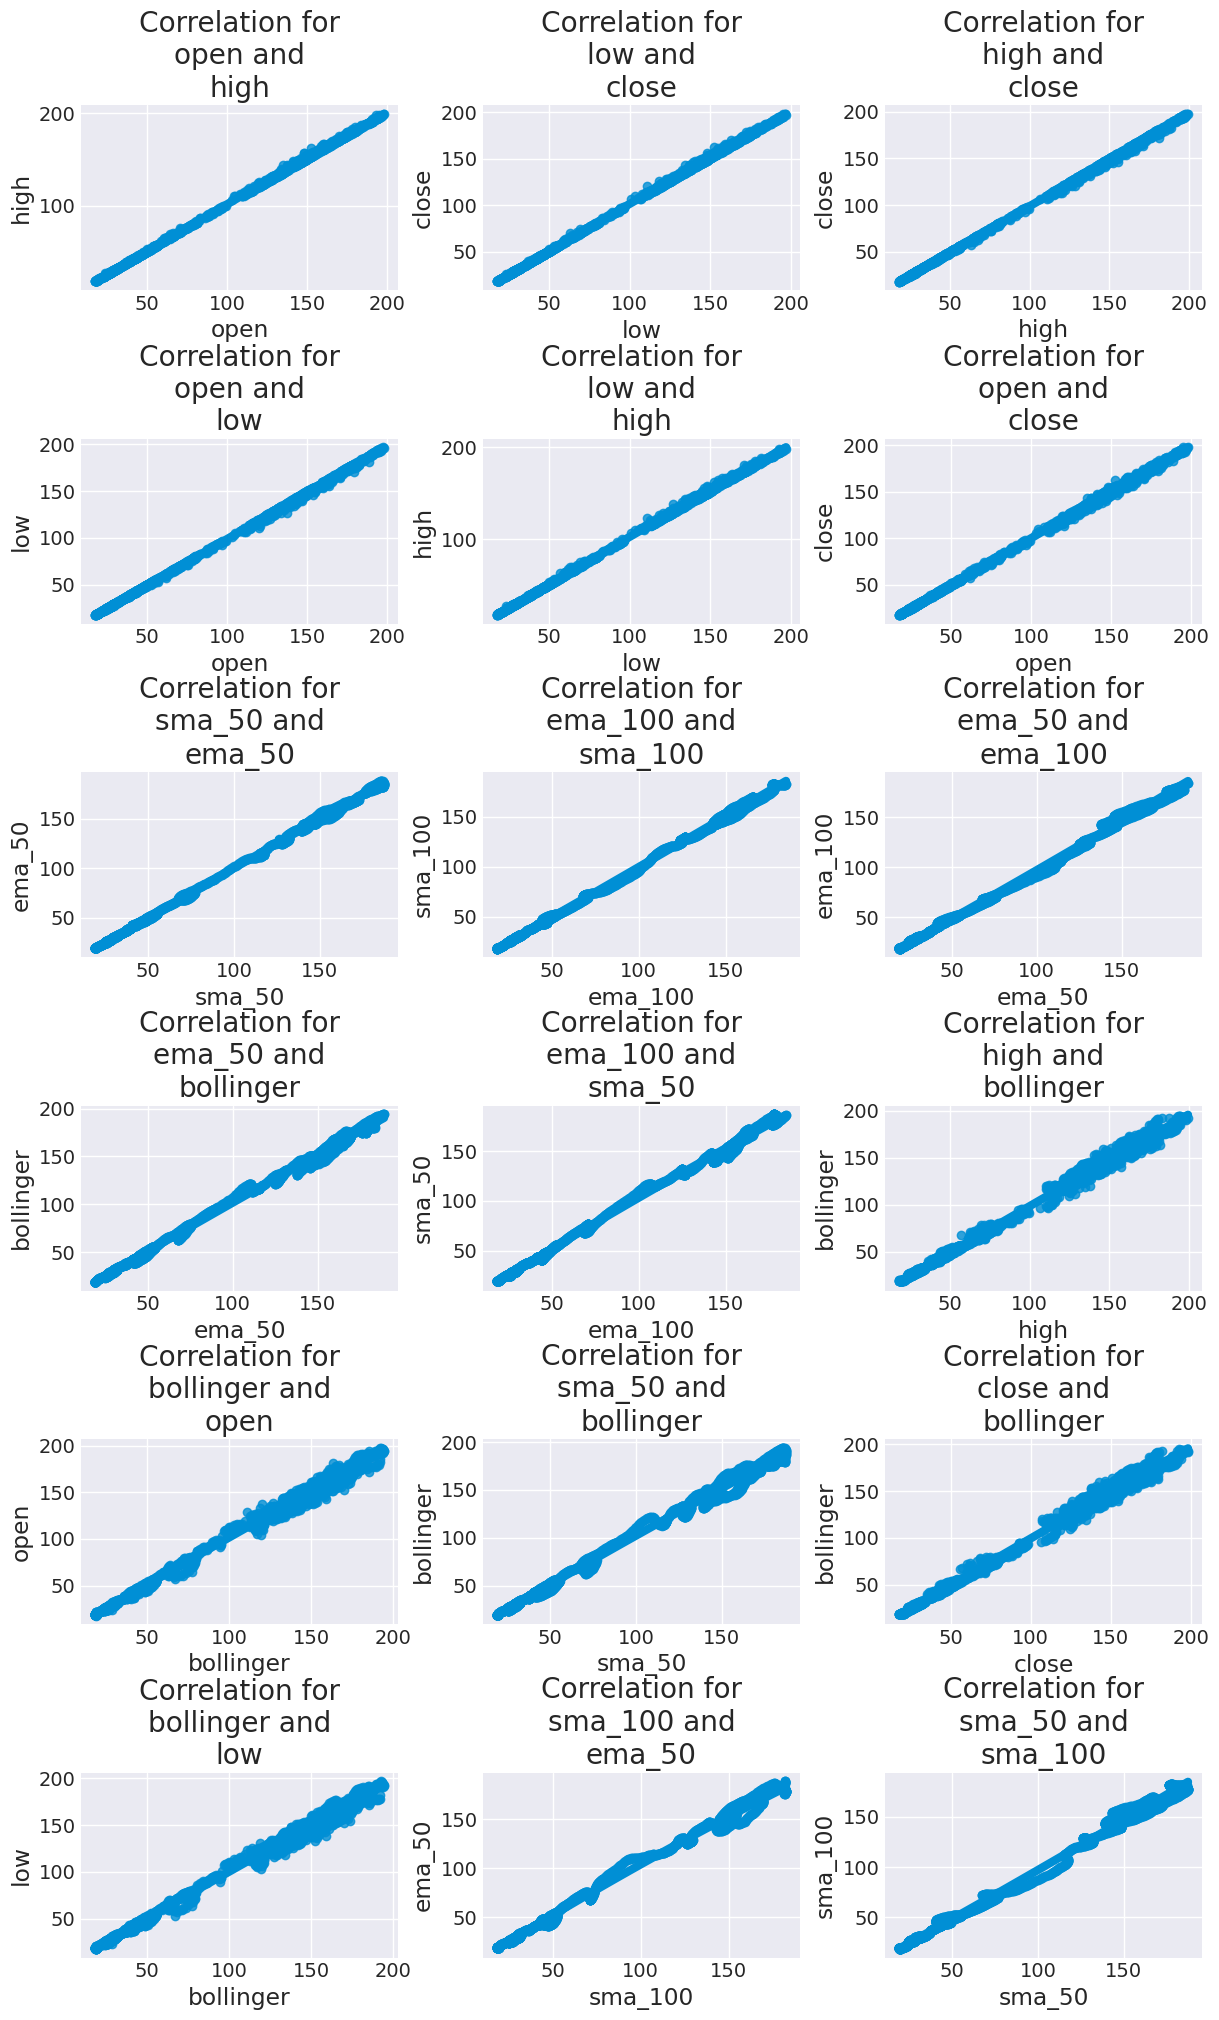

In [30]:
def continuous_correlations(df, figsize=(12,20), n_charts = 18, polyorder = 2, asc = False):
    continuous_rankedcorr = (df
                             .corr()
                             .unstack()
                             .sort_values(ascending=asc)
                             .drop_duplicates().reset_index())
    continuous_rankedcorr.columns = ["col1","col2","col3"]   

    # Plot Top Correlations
    top_corr = [(x,y) for x,y in list(continuous_rankedcorr.iloc[:, 0:2].values) if x != y]
    f, axes = plt.subplots(int(n_charts/3),3, figsize=figsize, sharex=False, sharey=False)
    row = 0
    col = 0
    for (x,y) in top_corr[:n_charts]:
        if col == 3:
            col = 0
            row += 1
        g = sns.regplot(x=x, y=y, data=df, order=polyorder, ax = axes[row,col])
        axes[row,col].set_title('Correlation for\n{} and\n{}'.format(x, y))
        col += 1
    plt.tight_layout(pad=0)
    plt.show()
    
continuous_correlations(df.loc[:,continuous])

In [31]:
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

df=df.sort_values('target')
def plot(df,year=None):
    init_notebook_mode(connected=True)  
    if year==None:
        df=df.sort_values('target')
        hdr="Overall"
    else:
        df=df[df.year==year].sort_values('target')
        hdr=str(year)
    fig2 = px.pie(df, names='target', 
                 height=450, width=600, 
                 hole=0.7, 
                 title='Price Trend: '+hdr,color='target',
                       color_discrete_sequence=['orange', 'green', 'blue'])
    fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)
    fig2.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                        plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                        title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                        font=dict(size=14, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
    return fig2

Plotting trend for Overall:


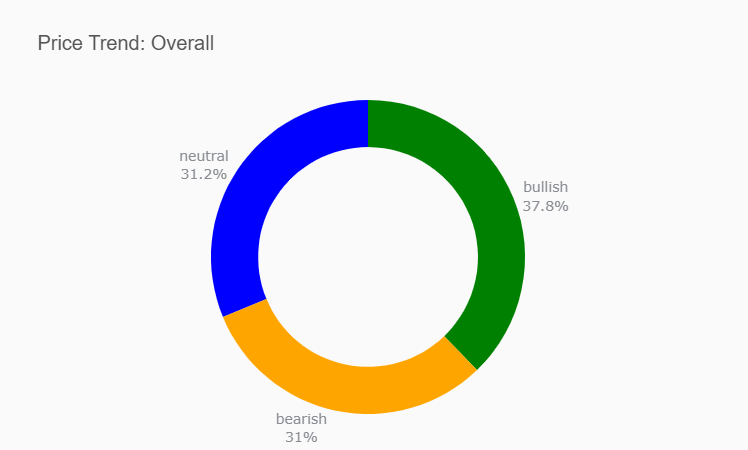

#
Plotting trend for  2014 :


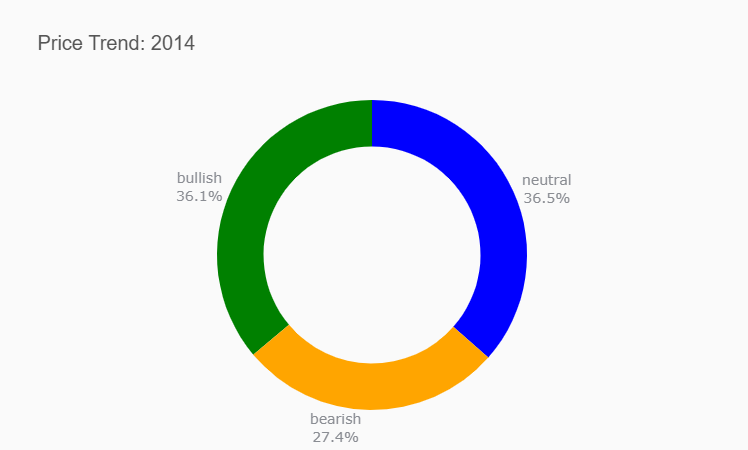

#
Plotting trend for  2015 :


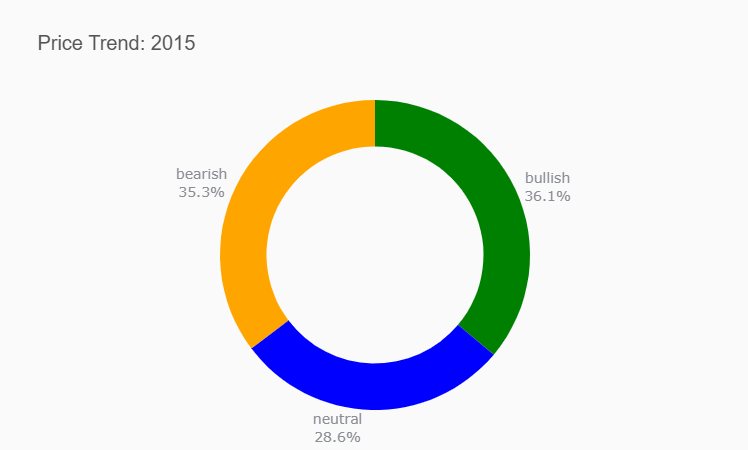

#
Plotting trend for  2016 :


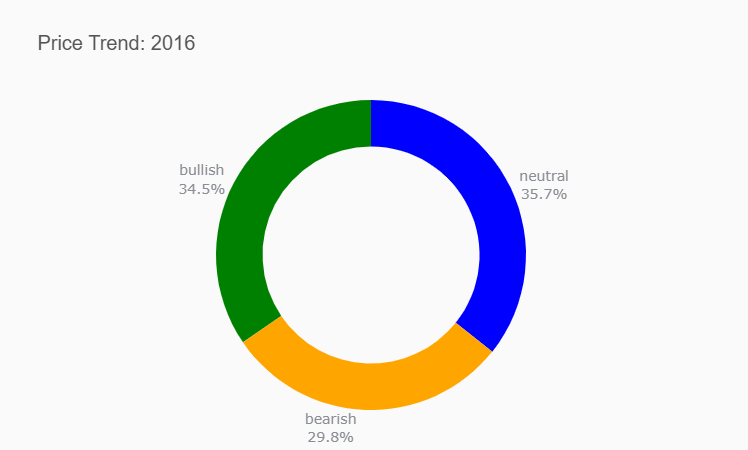

#
Plotting trend for  2017 :


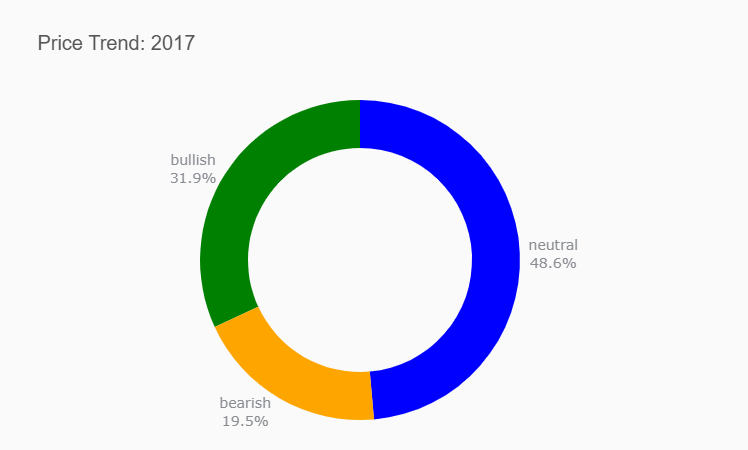

#
Plotting trend for  2018 :


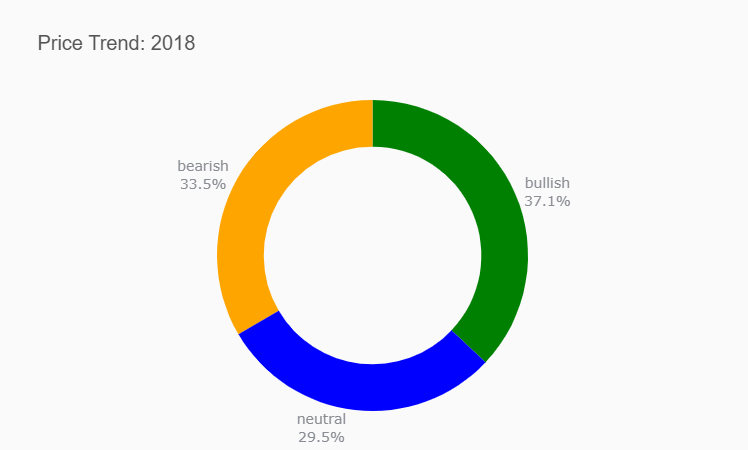

#
Plotting trend for  2019 :


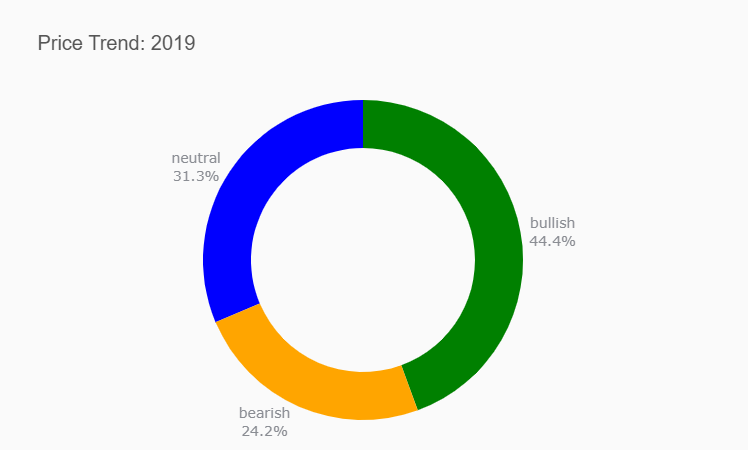

#
Plotting trend for  2020 :


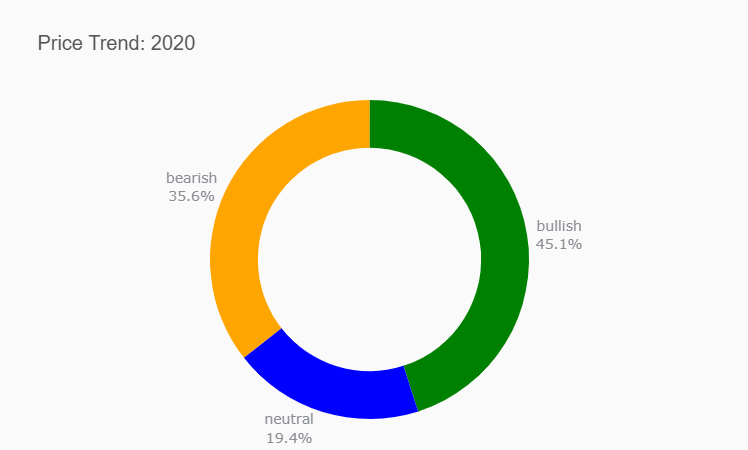

#
Plotting trend for  2021 :


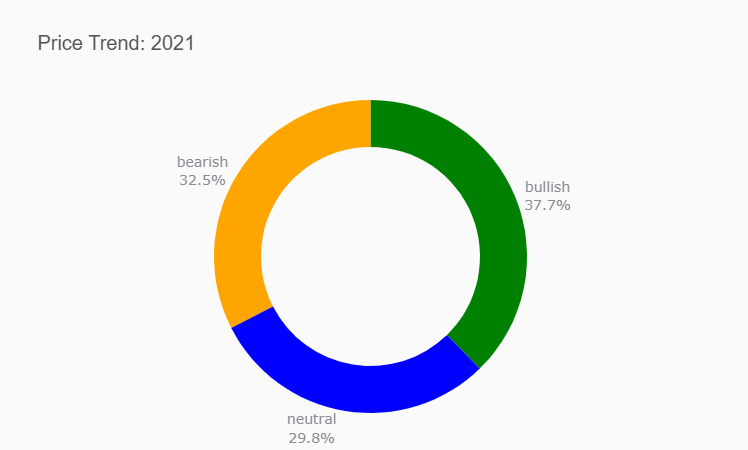

#
Plotting trend for  2022 :


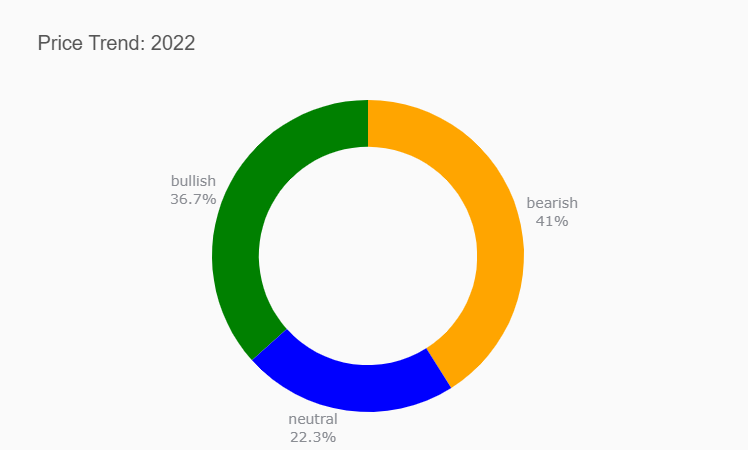

#
Plotting trend for  2023 :


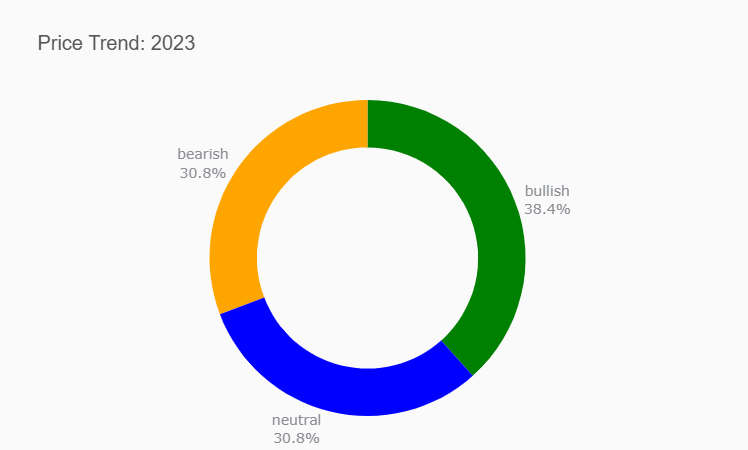

In [33]:
print("Plotting trend for Overall:")
plot(df,year=None).show()
for i in range(10):
    year=2014+i
    print("#")
    print("Plotting trend for ",year,":")
    plot(df,year=year).show()

In [34]:
numerical_features = [column for column in df.columns if df[column].dtype!="O"]
numerical_features

['open',
 'high',
 'low',
 'close',
 'volume',
 'rsi_7',
 'rsi_14',
 'cci_7',
 'cci_14',
 'sma_50',
 'ema_50',
 'sma_100',
 'ema_100',
 'macd',
 'bollinger',
 'TrueRange',
 'atr_7',
 'atr_14',
 'year']

In [35]:
numerical_features.remove("year")

In [36]:
len(numerical_features)

18

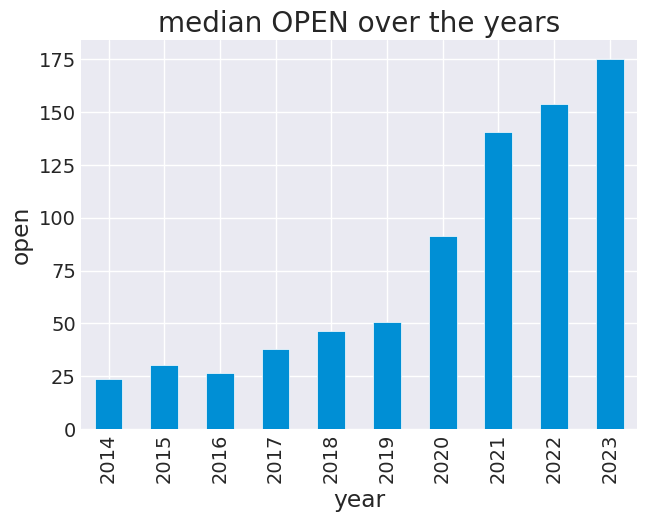

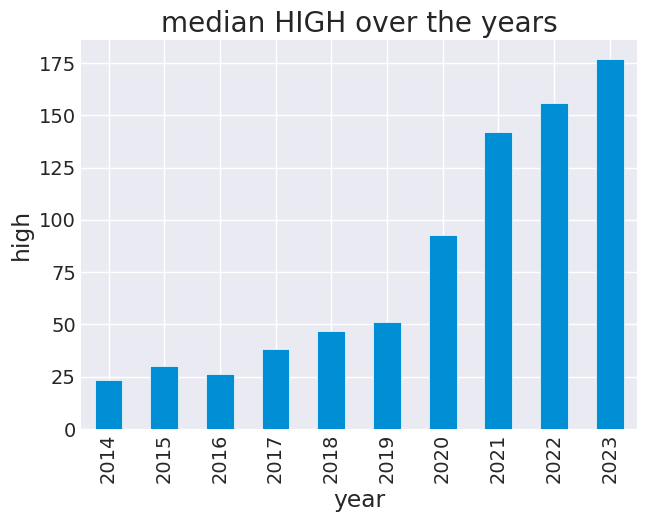

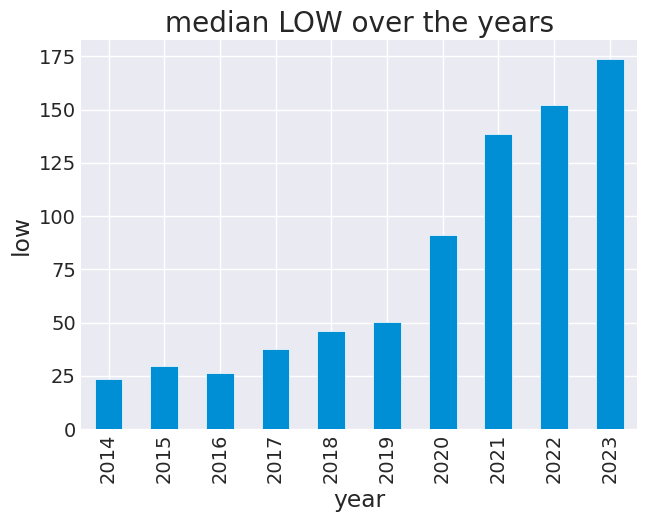

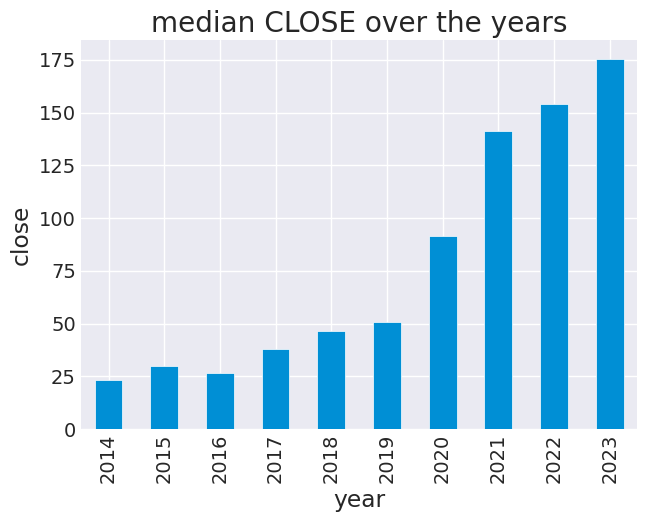

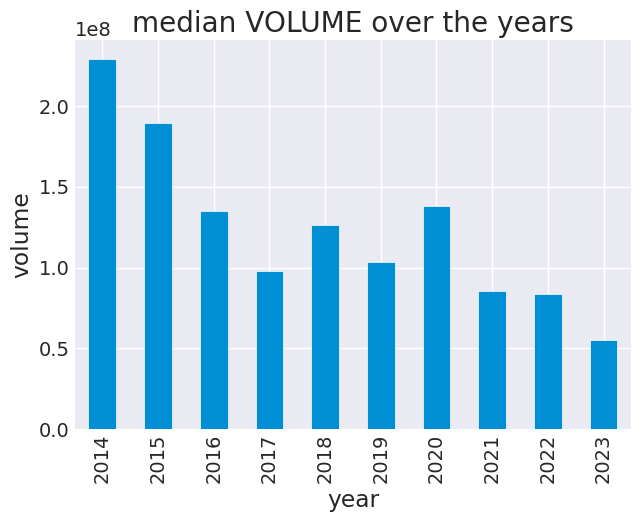

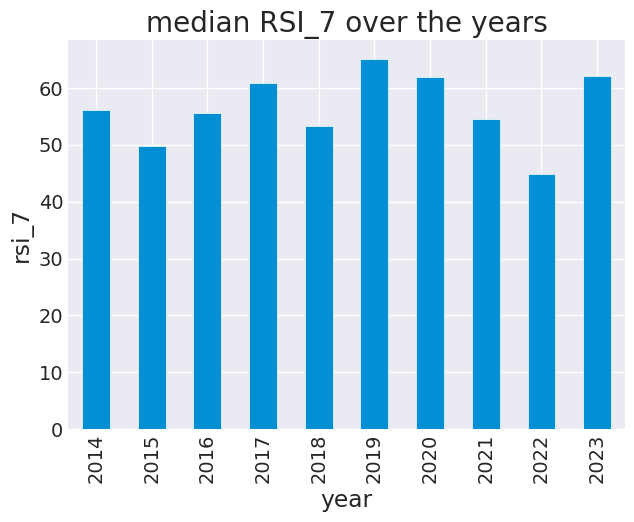

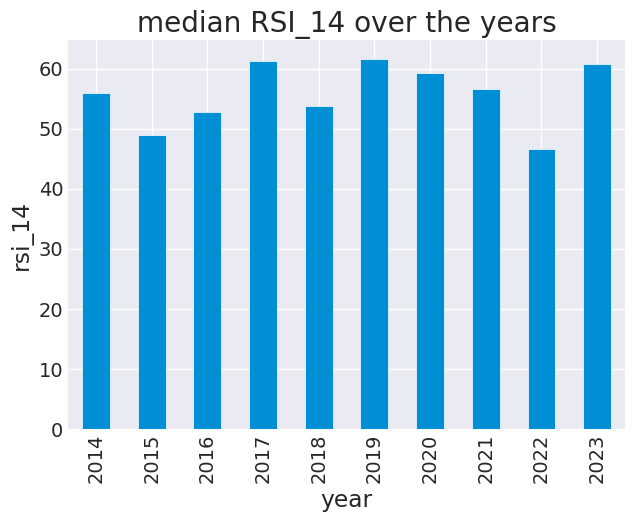

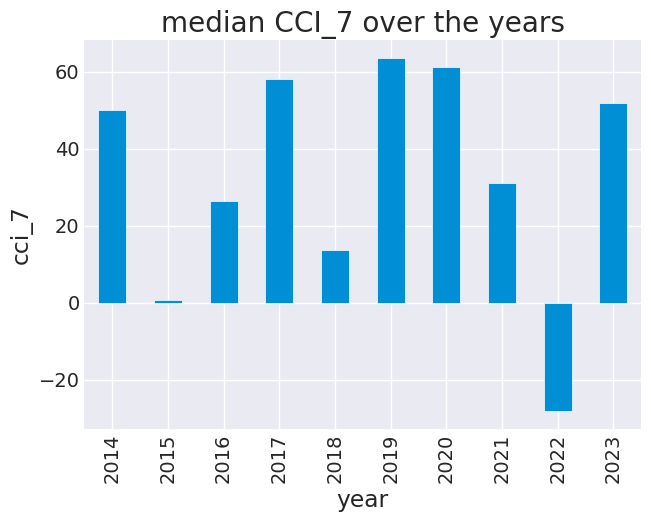

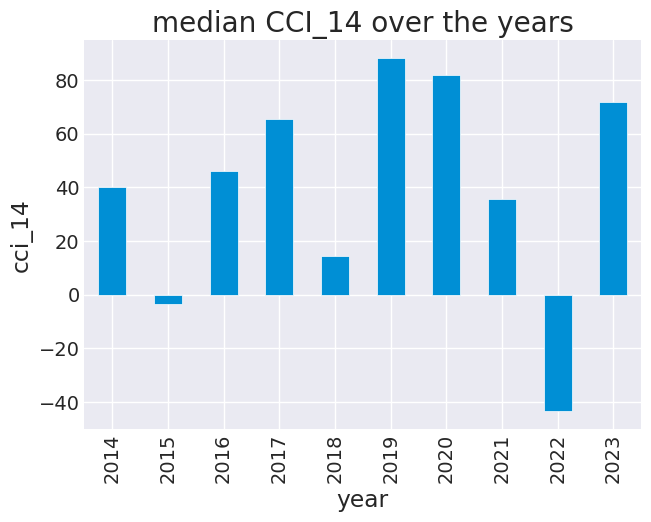

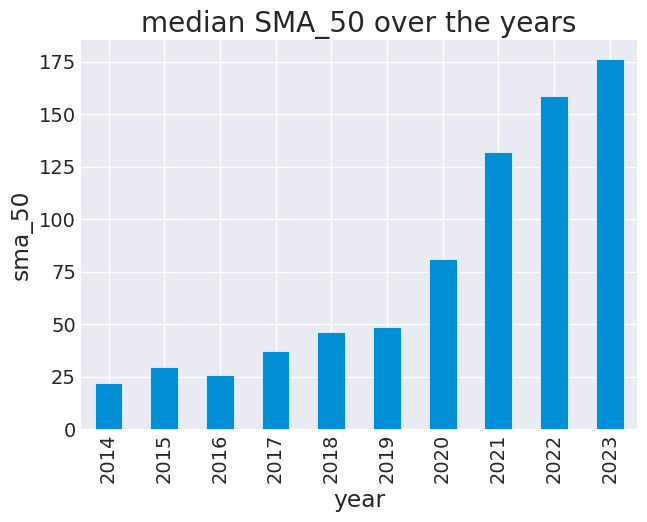

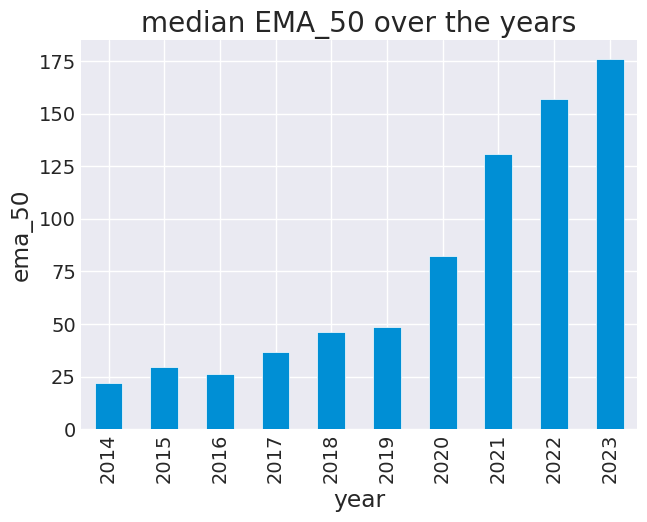

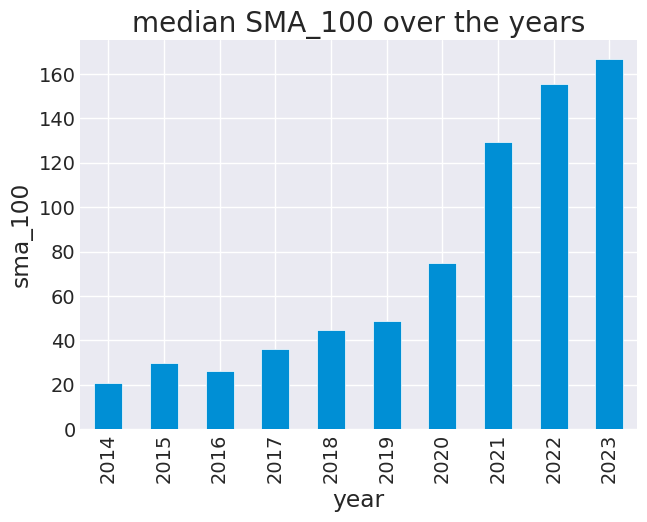

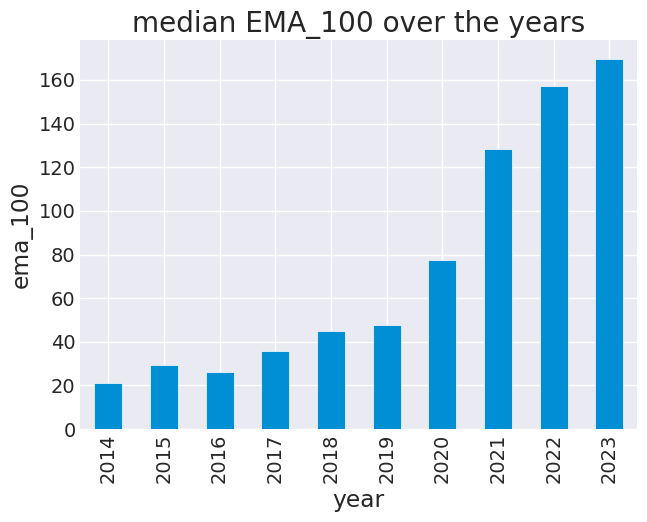

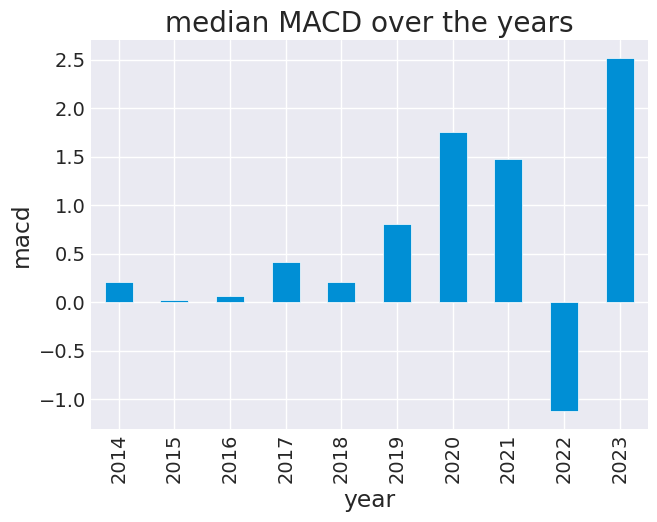

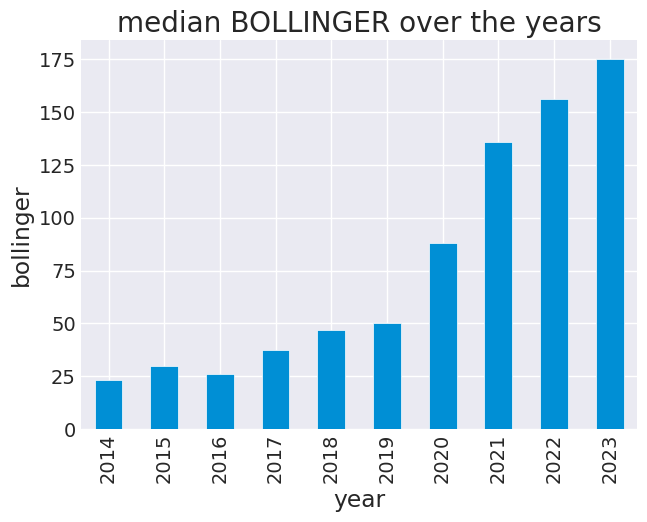

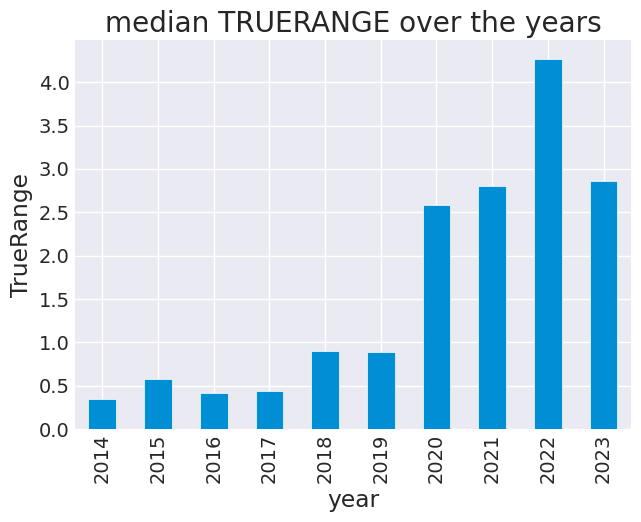

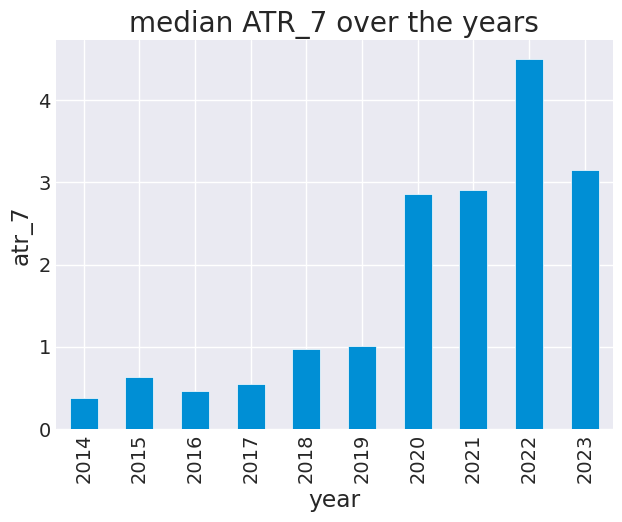

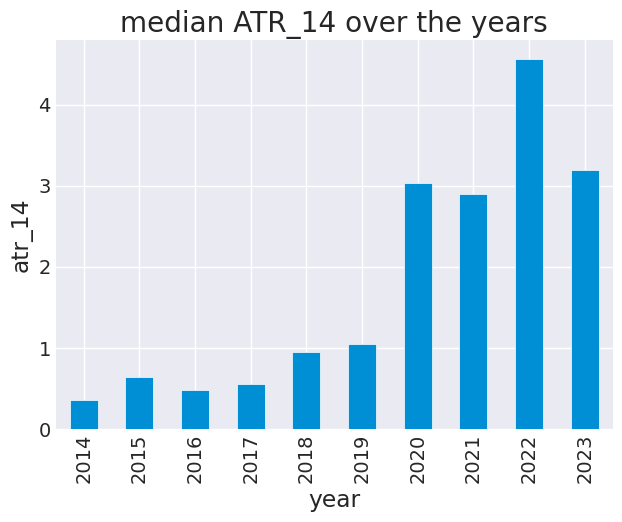

In [37]:
for feature in numerical_features:    
    df.groupby("year")[feature].median().plot.bar()
    plt.xlabel("year")
    plt.ylabel(feature)
    plt.title(f"median {feature.upper()} over the years")
    plt.show()

Domain expert can look at these graphs and infer various reasons for the fluctuation of various features. What we can see is an unprecedented growth from 2020 onwards which can be credited to many factors.

*This is the process for calculating mi scores which will be helpful in case of opting for applying regression models on the dataset*

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = df.copy()
df1[numerical_features]=scaler.fit_transform(df1[numerical_features])
df1.head()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target,year
date,,,,,,,,,,,,,,,,,,,,
2014-01-02,0.011982,0.010908,0.011642,0.010570,0.202248,0.421654,0.432004,0.274846,0.435566,0.002471,0.001933,0.000000,0.000000,0.484167,0.007594,0.016261,0.014314,0.013055,bearish,2014
2019-05-08,0.181828,0.183939,0.182919,0.182379,0.078072,0.411338,0.459044,0.358693,0.397927,0.174418,0.174943,0.157858,0.172771,0.536389,0.184442,0.061638,0.157408,0.151594,bearish,2019
2019-05-06,0.185142,0.188754,0.185358,0.190117,0.101514,0.584971,0.605804,0.494036,0.535246,0.172721,0.173943,0.156822,0.171906,0.556919,0.184004,0.153407,0.152997,0.143964,bearish,2019
2019-05-03,0.194291,0.192882,0.194738,0.194653,0.057151,0.727769,0.712159,0.678856,0.669640,0.171668,0.173075,0.156230,0.171290,0.559694,0.183187,0.043915,0.133222,0.130645,bearish,2019
2019-05-01,0.192891,0.197656,0.193344,0.192947,0.225892,0.732900,0.719154,0.859079,0.749790,0.169360,0.170989,0.155047,0.169900,0.554865,0.181062,0.279244,0.145590,0.133395,bearish,2019


In [39]:
X = df1.copy()
y = X["close"]
X = X.drop(columns=["close"])

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [40]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

low          4.195705
bollinger    2.817876
sma_100      2.734189
atr_14       1.461547
TrueRange    0.663230
rsi_7        0.110861
target       0.009514
Name: MI Scores, dtype: float64

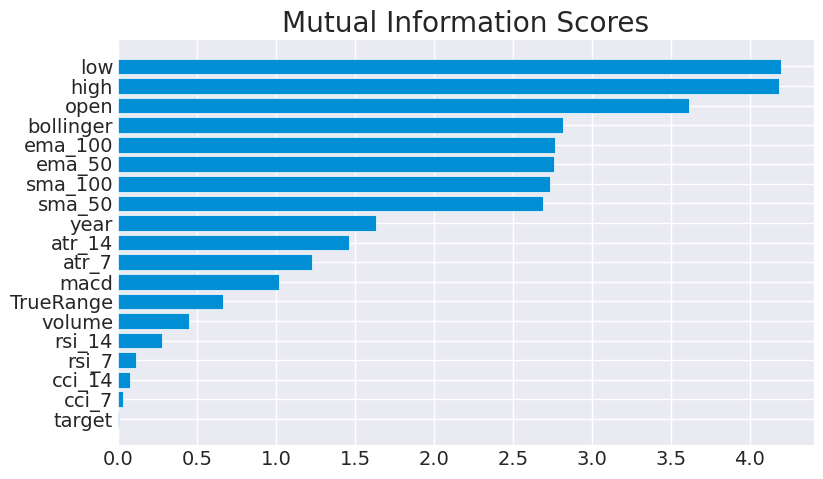

In [41]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# EDA ends 

# Prediction Model Building Starts

We will be using stacked LSTM model for time series stock price prediction.

In [42]:
df = pd.read_csv("/kaggle/input/apple-stock-price-prediction-10-years/aapl_2014_2023.csv")

In [43]:
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,19.282236,19.265060,18.372604,18.484713,0.194637,19.979268,0.321428,0.305722,0.316301,bearish
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,19.297314,19.267243,18.398896,18.501371,0.132887,19.936375,0.473929,0.329752,0.327561,bullish
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,19.310864,19.273472,18.418311,18.519794,0.091398,19.893571,0.471428,0.349991,0.337837,bearish
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,19.316671,19.274008,18.433146,18.535080,0.046768,19.857893,0.287141,0.341013,0.334216,bullish
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,19.329171,19.279313,18.449414,18.552493,0.021012,19.816875,0.245355,0.327347,0.327868,bearish


In [44]:
pdf = df[["date", "close"]]

In [45]:
pdf

,date,close
0,2014-01-02,19.754642
1,2014-01-03,19.320715
2,2014-01-06,19.426071
3,2014-01-07,19.287144
4,2014-01-08,19.409286
...,...,...
2511,2023-12-22,193.600006
2512,2023-12-26,193.050003
2513,2023-12-27,193.149994
2514,2023-12-28,193.580002


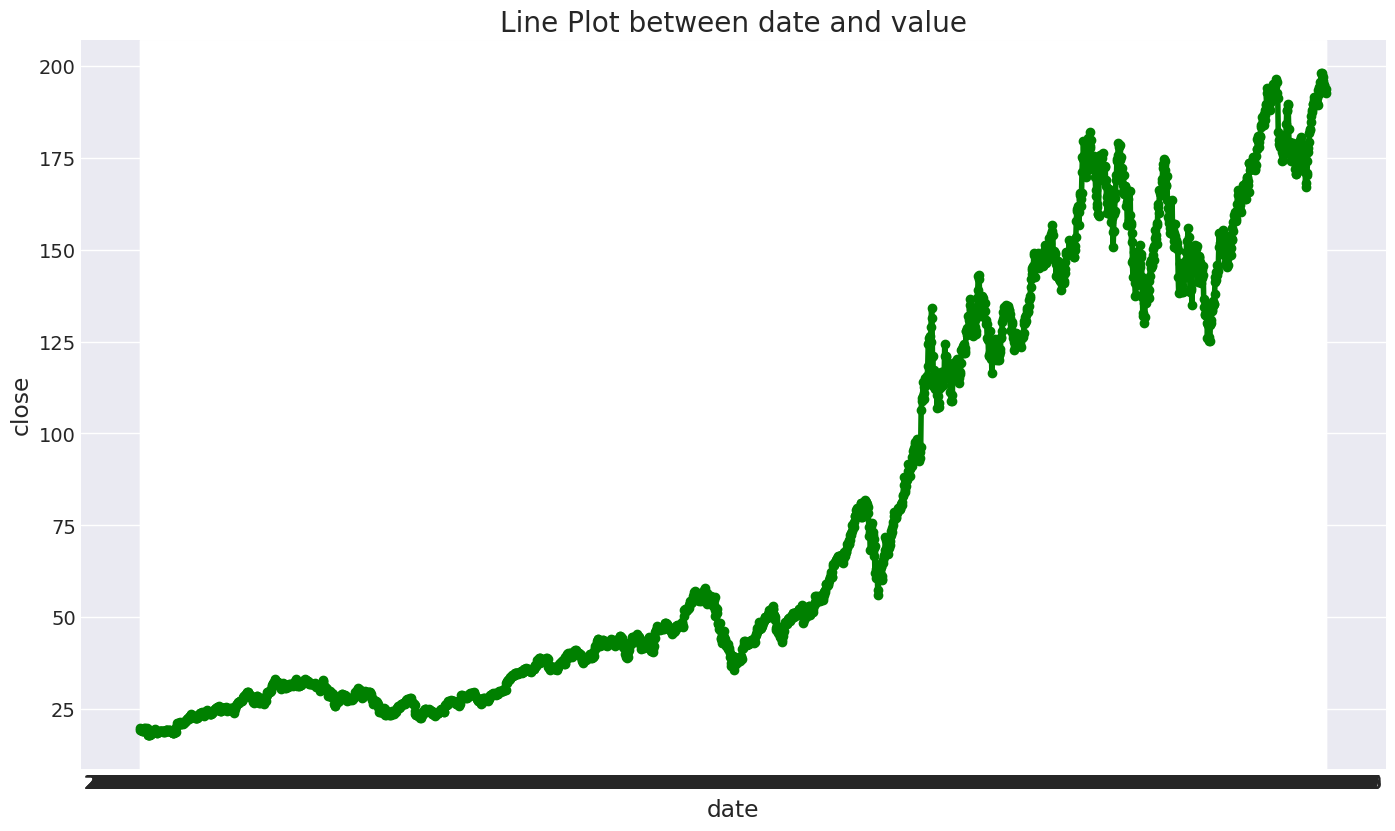

In [46]:
plt.figure(figsize=(15, 9))
plt.plot(pdf['date'], pdf['close'], marker='o', color='green')
plt.xlabel('date')
plt.ylabel('close')
plt.title('Line Plot between date and value')
plt.show()

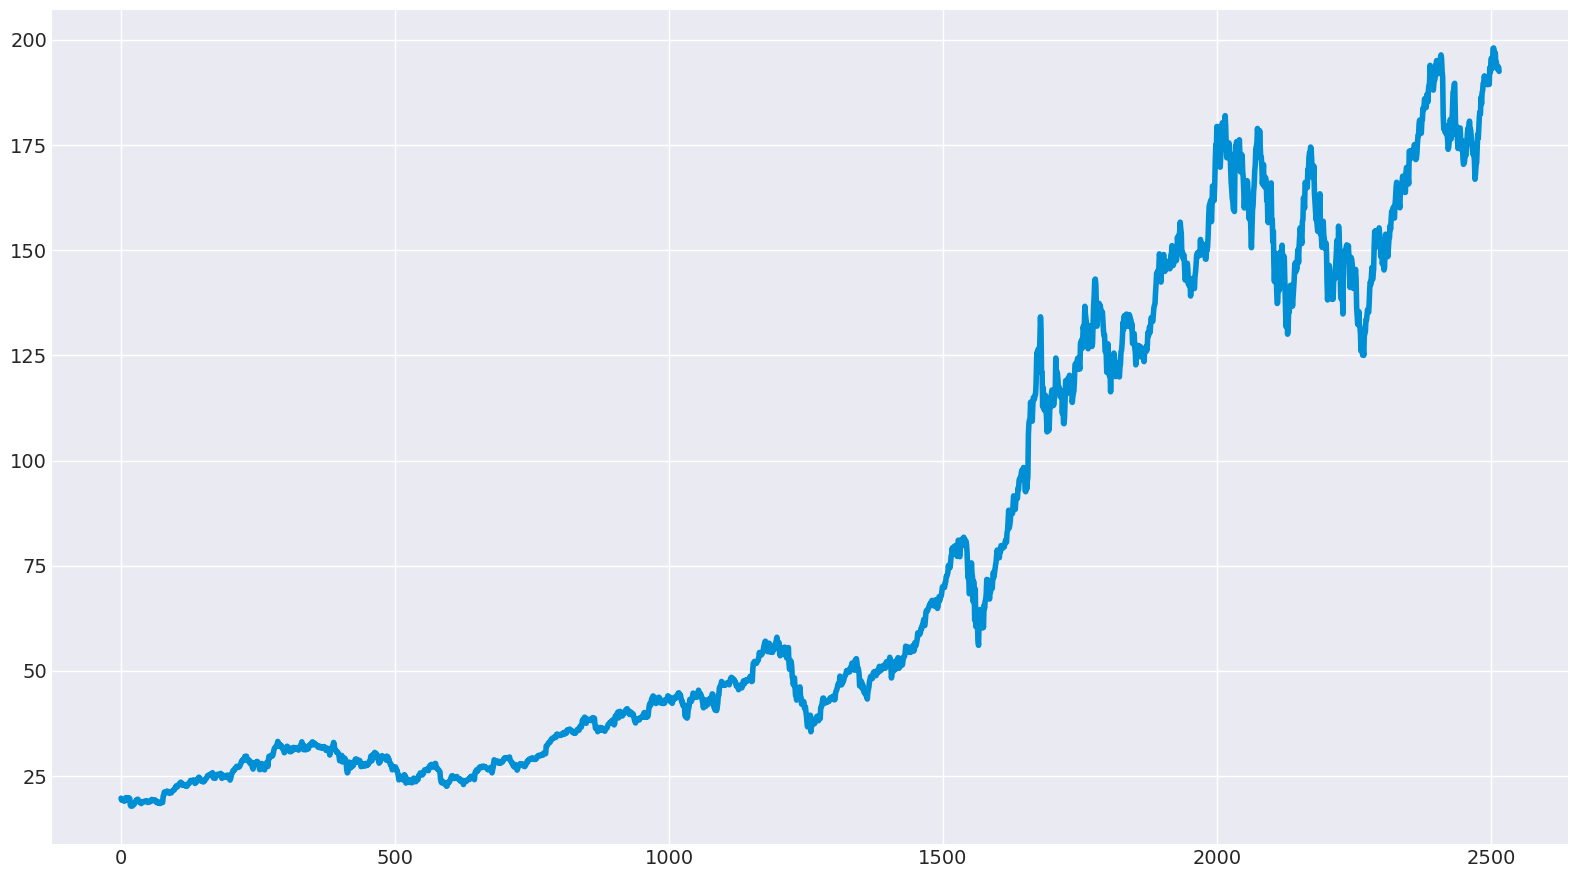

In [47]:
plt.figure(figsize=(16,9))
plt.plot(pdf["close"])
plt.tight_layout()

In [48]:
pdf = pdf["close"]
pdf

0        19.754642
1        19.320715
2        19.426071
3        19.287144
4        19.409286
           ...    
2511    193.600006
2512    193.050003
2513    193.149994
2514    193.580002
2515    192.529999
Name: close, Length: 2516, dtype: float64

In [49]:
scaler=MinMaxScaler(feature_range=(0,1))
pdf=scaler.fit_transform(np.array(pdf).reshape(-1,1))

In [50]:
pdf.shape

(2516, 1)

In [51]:
# splitting dataset into train and test split
training_size=int(len(pdf)*0.80)
test_size=len(pdf)-training_size
train_data,test_data=pdf[0:training_size,:],pdf[training_size:len(pdf),:1]

In [52]:
training_size,test_size

(2012, 504)

In [53]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        tr = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(tr)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [242]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [243]:
print(X_train.shape), print(y_train.shape)

(1951, 60)
(1951,)


(None, None)

In [244]:
print(X_test.shape), print(ytest.shape)

(443, 60)
(443,)


(None, None)

In [245]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [247]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [225]:
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=10, 
                                        verbose=1)

In [248]:
model.fit(X_train,y_train,
          validation_data=(X_test,ytest),
          epochs=100,
          batch_size=64,
          verbose=1,
         callbacks=[early_stopping_callback])

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0310 - val_loss: 0.0024
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.2363e-04 - val_loss: 0.0021
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.1514e-04 - val_loss: 0.0027
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.7537e-04 - val_loss: 0.0024
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.1891e-04 - val_loss: 0.0021
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.2636e-04 - val_loss: 0.0019
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.3129e-04 - val_loss: 0.0020
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.5669e-04 - val_loss: 0.0029
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.5580e-04 - val_loss: 0.0020
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.6036e-04 - val_loss: 0.0017
Epoch 10: early stopping


In [249]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [250]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [251]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

69.51659164300018

In [252]:
math.sqrt(mean_squared_error(ytest,test_predict))

162.8650898695983

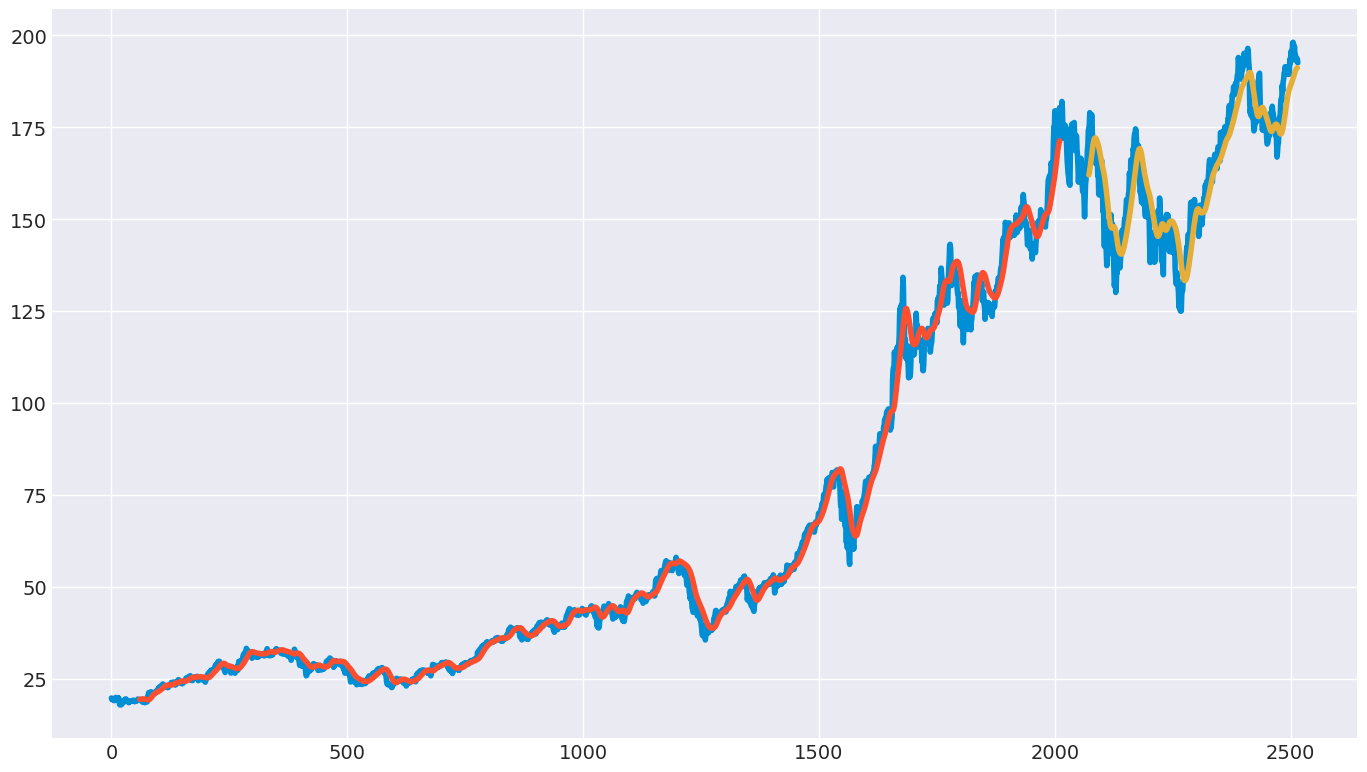

In [254]:
### Plotting 
# shift train predictions for plotting
look_back=60
plt.figure(figsize=(15,9))
trainPredictPlot = np.empty_like(pdf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(pdf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(pdf))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

the predicted data from model seems very good compared to actual data as neither does it overfit nor underfit. It is just giving us some basic idea of trend which can follow.

In [255]:
len(test_data)

504

In [256]:
x_input=test_data[444:].reshape(1,-1)
x_input.shape

(1, 60)

In [257]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [258]:
temp_input

[0.871297543276151,
 0.885610151465281,
 0.8939314320708678,
 0.8906028865435106,
 0.898424912502844,
 0.9034731782603148,
 0.8931547847618668,
 0.8924335793717806,
 0.8837239335052901,
 0.8764566928714519,
 0.8743486961407608,
 0.8600360824041108,
 0.8607017571149557,
 0.8631426771876352,
 0.8501615016330014,
 0.826806401900678,
 0.8341846151326726,
 0.8456679379882193,
 0.8483308088047314,
 0.8660828574540889,
 0.8860539641926197,
 0.8809501733034278,
 0.8952627870400781,
 0.9096309259084491,
 0.9155667283602712,
 0.9129039463040854,
 0.9350384972397424,
 0.9261625145214668,
 0.9408079628397791,
 0.9439700106372594,
 0.953400861893836,
 0.9532898837481595,
 0.9630534919211128,
 0.9585600114891365,
 0.9622768446121118,
 0.9548431839136821,
 0.9538445858608483,
 0.9572285788546407,
 0.9515146383863248,
 0.9547322113155258,
 0.9618885570164938,
 0.9518474785155074,
 0.9739821126639704,
 0.9678798901475573,
 0.9786975382922588,
 0.9866859843161834,
 0.9726506800294746,
 0.981138463912458

In [259]:
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<180):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.9615620374679565], [0.9611083269119263], [0.9603539705276489], [0.9593530893325806], [0.9581629037857056], [0.9568362236022949], [0.9554174542427063], [0.953942596912384], [0.95243901014328], [0.950926661491394], [0.9494197368621826], [0.9479273557662964], [0.9464555382728577], [0.9450076818466187], [0.9435853958129883], [0.9421893954277039], [0.9408191442489624], [0.9394744038581848], [0.9381544589996338], [0.9368583559989929], [0.9355853199958801], [0.9343345761299133], [0.93310546875], [0.9318974018096924], [0.9307096004486084], [0.9295417666435242], [0.9283933639526367], [0.9272638559341431], [0.9261530637741089], [0.9250603318214417], [0.9239854216575623], [0.9229280948638916], [0.9218878149986267], [0.9208643436431885], [0.919857382774353], [0.9188665151596069], [0.9178915023803711], [0.9169320464134216], [0.9159878492355347], [0.9150586128234863], [0.9141439199447632], [0.9132437705993652], [0.9123576283454895], [0.911485493183136], [0.9106268286705017], [0.9097815752029419]

In [260]:
day_new=np.arange(1,101)
day_pred=np.arange(101,281)

In [261]:
len(pdf)

2516

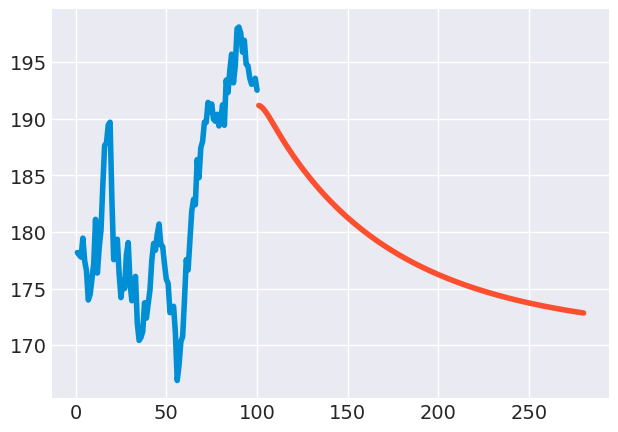

In [262]:
plt.plot(day_new,scaler.inverse_transform(pdf[2416:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

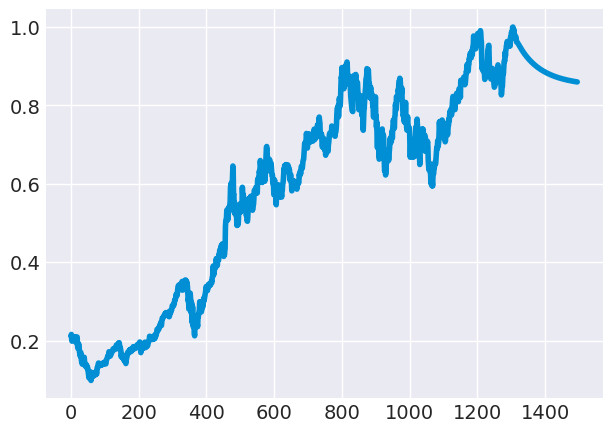

In [263]:
df2=pdf.tolist()
df2.extend(lst_output)
plt.plot(df2[1200:])

In [264]:
df2=scaler.inverse_transform(df2).tolist()

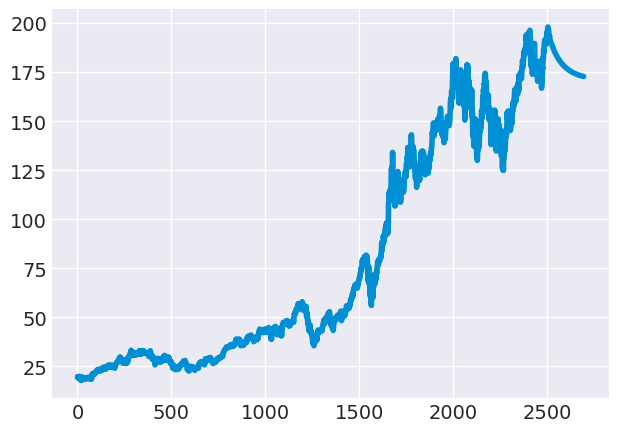

In [265]:
plt.plot(df2)

This looks like a decent prediction. Factually stock prices of apple at March were fairly in the range of 170 which is what the model predicted. But after that it grew but our model shows the curve to smoothen which is actually a decent prediction of trend which might come. 

**Overall the model prediction for trend of next 60-100 days is pretty good!!**